## Análise exploratória

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial
sns.set()

In [2]:
df = pd.read_csv('data.csv')

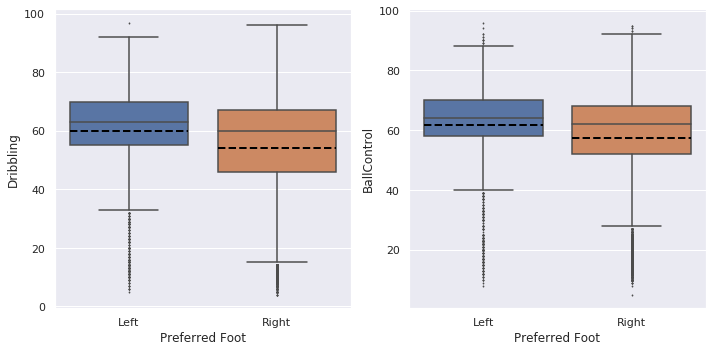

In [52]:
plt.figure(figsize=(10, 5))

meanlineprops = dict(linestyle='--', linewidth=2, color='black')
plt.subplot(1, 2, 1)
sns.boxplot(x="Preferred Foot", y="Dribbling", data=df, fliersize=1, showmeans=True, meanline=True, meanprops=meanlineprops)

plt.subplot(1, 2, 2)
sns.boxplot(x="Preferred Foot", y="BallControl", data=df, fliersize=1, showmeans=True, meanline=True, meanprops=meanlineprops)
plt.tight_layout()
plt.show()

Quem é melhor em média: canhotos ou destros? Para avaliar esse questionamento, como o controle de bola e a habilidade de drible dos jogadores são bons indicativos da "habilidade com o pé", usaremos esses para compará-los. Calculamos, então, as médias das habilidades em respeito a cada grupo, os resultados podem ser verificados no box-plot da figura X, a linha tracejada indica a média. Assim, a tendência é que um jogador canhoto aleatório, possua melhor controle de bola e drible que um jogador destro.

Para verificar essa afirmação, separamos os atletas nos respectivos grupos (Canhotos e Destros), e definimos como hipótese nula: "A média da habilidade de drible de um jogador canhoto é igual a média da habilidade de drible de um jogador destro". Como queremos verificar se há diferença entre as médias dos atletas, nossa hipótese alternativa é de que a média dos canhotos é diferente da dos destros. Definimos o nível de significância, $\alpha$ = 0.05.

Realizando um teste T entre os dois grupos, obtivemos um valor-p igual a 0.001, existindo evidência suficiente para rejeitarmos nossa hipótese nula.

O mesmo processo foi repetido, mas agora considerando a habilidade de controlar a bola (BallControl) dos atletas. Encontramos um valor-p igual a 0.005, e novamente, possuimos evidência suficiente para rejeitar a hipótese nula de que as médias de controle de bola são iguais entre os dois grupos.

In [23]:
import scipy.stats as ss

left = df[df["Preferred Foot"] == "Left"]
right = df[df["Preferred Foot"] == "Right"]

print("Destro controle de bola média:", right["BallControl"].mean())
print("Canhoto controle de bola média:", left["BallControl"].mean())

print("Destro controle de bola mediana:", right["BallControl"].median())
print("Canhoto controle de bola mediana:", left["BallControl"].median())

a = right["BallControl"].sample(n=300)
b = left["BallControl"].sample(n=300)
print(ss.ttest_ind(a, b))

Destro controle de bola média: 57.30498996271867
Canhoto controle de bola média: 61.89527428164332
Destro controle de bola mediana: 62.0
Canhoto controle de bola mediana: 64.0
Ttest_indResult(statistic=-2.810800816975942, pvalue=0.005103724736818792)


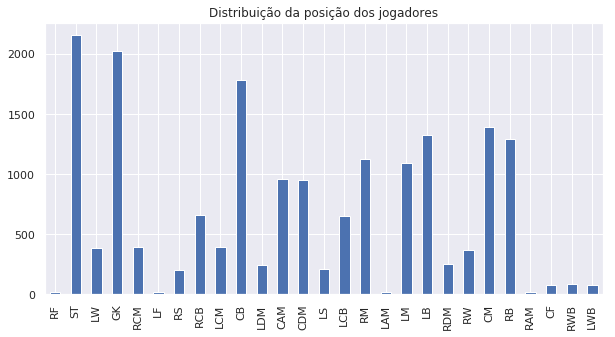

In [8]:
posicoes = df['Position'].dropna().unique()
posicoes_cnt = []
for i in posicoes:
    posicoes_cnt.append(df['Position'].tolist().count(i))

plt.figure(figsize=(10,5))
plt.title("Distribuição da posição dos jogadores")
df_pos = pd.Series(posicoes_cnt, posicoes)
df_pos.plot.bar()

plt.show()

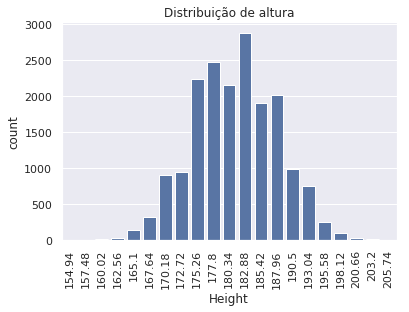

In [9]:
## Distribuição da altura dos jogadores

plt.title("Distribuição de altura")

ax = sns.countplot(x="Height", data=df, color='b')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 2)) for label in labels])
plt.xticks(rotation=90)

plt.show()

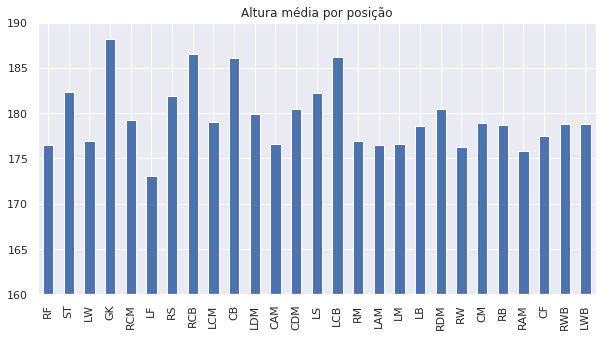

In [10]:
## Altura média por posição

# Evidentemente, jogadores de defesa (GK, CB, RCB, LCB) e tendem ser maiores, enquanto que jogadores que necessitam 
# de mais mobilidade, como alguns atacantes (LF e RF) e meias (CAM, RAM, etc.), possuem menor altura.

avg_alt_pos = []

for i in posicoes:
    avg_alt_pos.append(df[df['Position'] == i]['Height'].mean())


plt.figure(figsize=(10,5))
plt.title("Altura média por posição")

df_avg_alt_pos = pd.Series(avg_alt_pos, posicoes)
df_avg_alt_pos.plot.bar(color='b')

plt.ylim((160, 190))

plt.show()

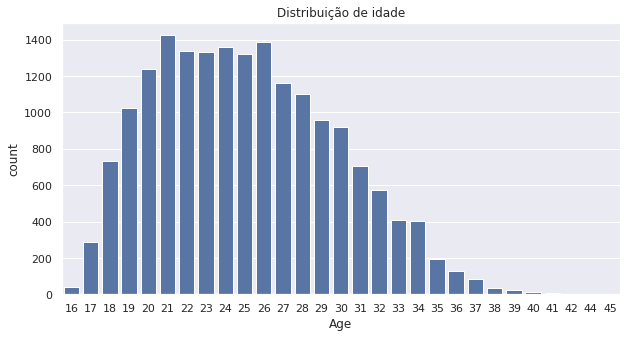

In [11]:
## Distribuiçao de idade

# A grande maioria dos jogadores está concentrada entre 19 e 30 anos.

plt.figure(figsize=(10, 5))
plt.title("Distribuição de idade")
age_distrib = sns.countplot(x="Age", data=df, color='b')

plt.show(age_distrib)

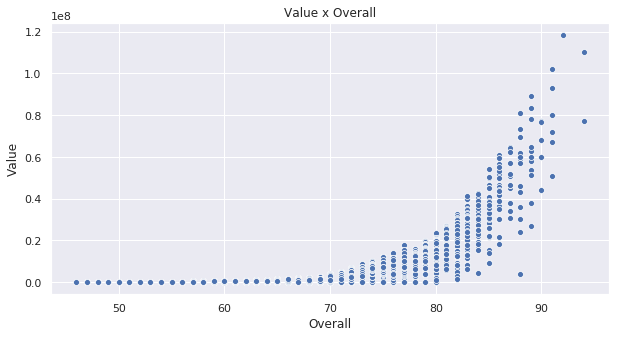

ρ = 0.908123981757991


In [12]:
import scipy.stats as ss

## Correlações

# Por apresentar alguns outliers, foi utilizada a correlação de Spearman, para as colunas "Overall" e "Value"
# Como esperado, jogadores com overall alto possuem alto valor de mercado, estando os dois atributos altamente
# correlacionados, ρ = 0.91. Entretanto, ainda é possível fazer um bom negócio e encontrar jogadores com Overall 
# alto e preço baixo.

value_overall, p_value = ss.spearmanr(df["Overall"], df["Value"])

txt = "ρ = " + str(value_overall)

plt.figure(figsize=(10,5))
plt.title("Value x Overall")
ax = sns.scatterplot(x="Overall", y="Value", data=df)

plt.show()

print(txt)

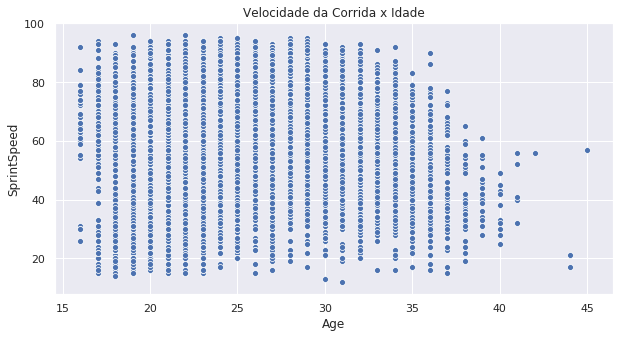

In [13]:
# Conforme vão ficando mais velhos, os jogadores tendem a perder velocidade na corrida.

speed_age, p_value = ss.pearsonr(df["Age"], df["SprintSpeed"])

plt.figure(figsize=(10,5))
plt.title("Velocidade da Corrida x Idade")
ax = sns.scatterplot(x="Age", y="SprintSpeed", data=df)

plt.show()

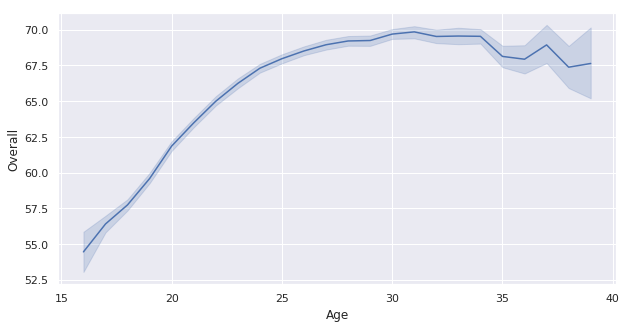

Número de jogadores com 40 ou mais anos: 22


In [14]:
## Gráfico de linha com idade e overall


ages = df[["Age", "Overall"]]

# Usando apenas os com idade menor que 40 
ages = ages[ages["Age"] < 40]
plt.figure(figsize=(10,5))
sns.lineplot(x="Age", y="Overall", data=ages)

plt.show()

# número de jogadores com idade >= 40 anos é muito pequena, G. Buffon é o outlier que puxa para cima a média
# 40 anos e Overall de 88

# Como existem apenas 22 jogadores no dataset com 40 ou mais anos, estes foram removidos para plotar o gráfico
# de Overall vs Idade. Como era de se esperar, os jogadores tendem a evoluir conforme ficam maduros e atingem
# seu pico de perfomance aos 30 - 32 anos, e, a partir daí, tendem a perder desempenho, tendo uma leve melhora
# aos 37 - 38 anos.

over_40 = df[df["Age"] >= 40]
print("Número de jogadores com 40 ou mais anos:", len(over_40))


# filtrar os jogadores com mais de 25 anos e calcular a correlaçao
# regressão linear

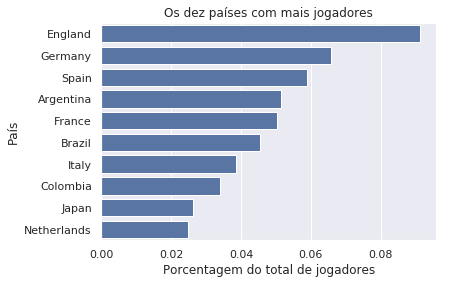

In [12]:
## Acho que esse gráfico não é mais necessário por causa do cloromapa abaixo

## Gráfico de barra com porcentagem dos países representados

countries = df.groupby("Nationality", as_index = False).count().sort_values("ID", ascending=False)

countries = countries[["Nationality", "ID"]]

countries = countries.rename(columns={"Nationality": "Nationality", "ID":"Count"})

total = countries["Count"].sum()

countries["Percentages"] = countries["Count"]/total

sns.barplot(x="Percentages", y="Nationality", data=countries[:10], color='b')

plt.title("Os dez países com mais jogadores")
plt.xlabel("Porcentagem do total de jogadores")
plt.ylabel("País")

plt.show()

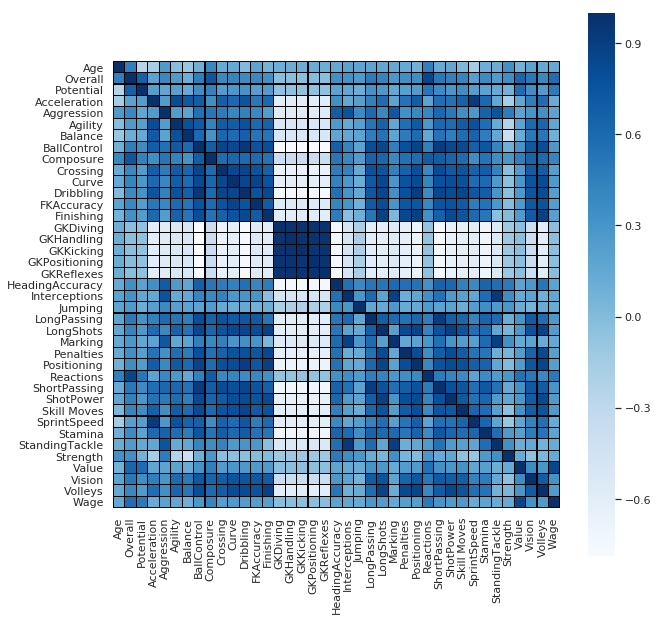

In [21]:
# Os atributos de goleiro estão altamente relacionados entre si, e muito pouco relacionados com os outros
# atributos, claramente indicando a separação do dataset em dois clusters: goleiros e "não-goleiros".
# Além disso, atributos como, por exemplo, 'Drible', 'Curve', 'Crossing' e 'Finishing', relacionados à habilidade
# física do jogador também estão altamente correlacionados. Por fim, como mais um exemplo, jogadores com 'Strengh' 
# alto possuem pouco 'Control', 'Balance', 'Agility', que são atributos indicativos de velocidade.

chosen_columns = df[['Name','Age','Nationality','Overall','Potential','Acceleration','Aggression',
'Agility','Balance','BallControl', 'Composure','Crossing','Curve','Club','Dribbling','FKAccuracy',
'Finishing','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','HeadingAccuracy','Interceptions',
'Jumping','Joined','LongPassing','LongShots','Marking','Penalties',
'Position','Positioning','Preferred Foot','Reactions','ShortPassing','ShotPower','Skill Moves',
'SprintSpeed','Stamina','StandingTackle','Strength','Value','Vision','Volleys','Wage','Work Rate']]

plt.figure(figsize=(10,10))
sns.heatmap(chosen_columns.corr(),linewidths=0.1,linecolor='black',square=True,cmap='Blues')
plt.show()

## UEFA Champions League

In [23]:
## Dataframe com o top 8 da UEFA Champions League 2018-19

tot = df[df['Club'] == 'Tottenham Hotspur']
city = df[df['Club'] == 'Manchester City'] 

ajax = df[df['Club'] == 'Ajax']
juv = df[df['Club'] == 'Juventus']

united = df[df['Club'] == 'Manchester United']
barca = df[df['Club'] == 'FC Barcelona']

liv = df[df['Club'] == 'Liverpool']
porto = df[df['Club'] == 'FC Porto']

frames = [tot, city, ajax, juv, united, barca, liv, porto]

champions = pd.concat(frames)

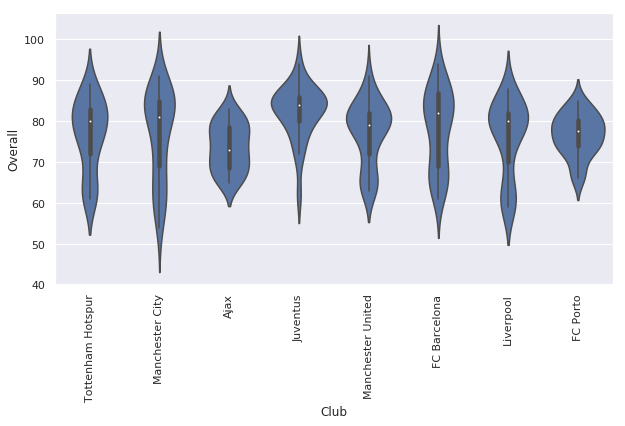

In [24]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Club', y='Overall', data=champions, color='b')
plt.xticks(rotation=90)
plt.show()

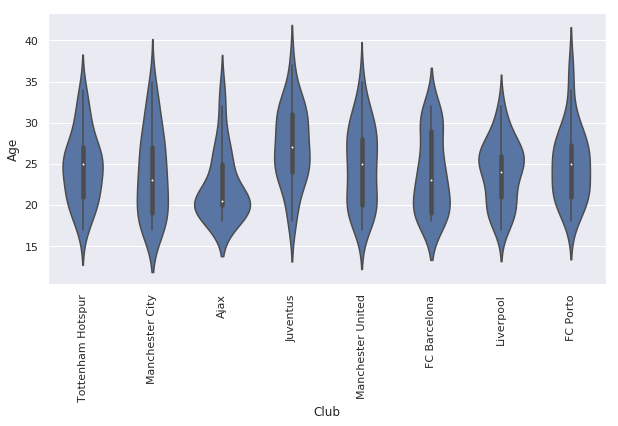

In [25]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Club', y='Age', data=champions, color='b')
plt.xticks(rotation=90)
plt.show()

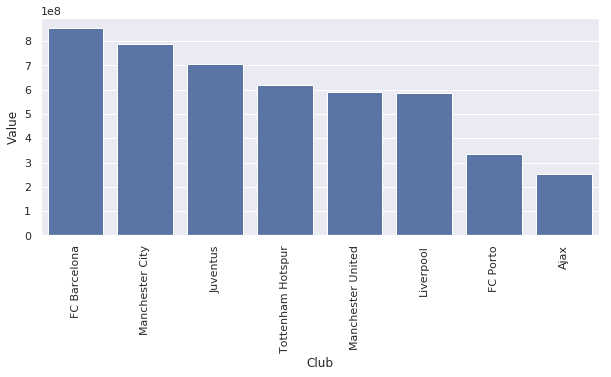

In [26]:
# Mesmo com times relativamente "baratos", o FC Porto e o Ajax conseguiram bons resultados no campeonato.
# Com o Porto avançando até as quartas de finais e o Ajax com um surpreendente resultado sobre a Juventus 
# para alcançar as semifinais.

cost = pd.DataFrame(champions.groupby('Club')['Value'].sum().reset_index()).sort_values(by='Value', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x='Club', y='Value', data=cost, color='b')
plt.xticks(rotation=90)
plt.show()

# Jogador mais similar

In [98]:
df = pd.read_csv('data_com_dummy.csv')

In [99]:
df.head(3)

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Jersey Number_48.0,Jersey Number_52.0,Jersey Number_54.0,Jersey Number_84.0,Jersey Number_82.0,Jersey Number_65.0,Jersey Number_64.0,Jersey Number_51.0,Jersey Number_59.0,Jersey Number_85.0
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,...,0,0,0,0,0,0,0,0,0,0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,...,0,0,0,0,0,0,0,0,0,0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,...,0,0,0,0,0,0,0,0,0,0


In [123]:
def jogador_similar(nome_jogador, df):
    jogador = df.where(df['Name'] == nome_jogador).dropna(how = 'all')
    warning = False
    if len(jogador) > 1:
        warning = True
        jogador = jogador.iloc[0]
    df_sem_jogador = df.where(df['Name'] != nome_jogador).dropna(how = 'all')
    if warning:
        jogadores_mesma_posicao = df_sem_jogador.where(df_sem_jogador['Position'] == str(jogador['Position']) ).dropna(how = 'all')
    else:
        jogadores_mesma_posicao = df_sem_jogador.where(df_sem_jogador['Position'] == str(jogador['Position'].iloc[0]) ).dropna(how = 'all')
    
    colunas_relevantes = df.columns.tolist()[:83]
    for i in ['Unnamed: 0', 'ID', 'Name', 'Age','Position', 'Nationality', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',\
          'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Jersey Number', 'Joined',\
          'Contract Valid Until', 'Height', 'Weight']:
        colunas_relevantes.remove(i)
        
    similaridades = []
    jogador1_cmp = jogador[colunas_relevantes]
    for i in range(len(jogadores_mesma_posicao)):
        jogador2_cmp = jogadores_mesma_posicao[colunas_relevantes].iloc[i]
        result = 1 - spatial.distance.cosine(jogador1_cmp, jogador2_cmp)
        similaridades.append(result)   
        
    maior = max(similaridades)
    for i in range(len(similaridades)):
        if similaridades[i] == maior:
            break

    mais_similar = pd.Series(jogadores_mesma_posicao.iloc[i])
    return mais_similar

In [124]:
names_top10 =df['Name'].head(10).tolist()

In [125]:
similares = {}
for name in names_top10:
    #print(name)
    similar = jogador_similar(name, df)['Name']
    similares[name] = similar

L. Messi
Cristiano Ronaldo
Neymar Jr
De Gea
K. De Bruyne
E. Hazard
L. Modrić
L. Suárez
Sergio Ramos
J. Oblak


In [127]:
similares

{'L. Messi': 'D. Mertens',
 'Cristiano Ronaldo': 'S. Agüero',
 'Neymar Jr': 'Isco',
 'De Gea': 'J. Livesey',
 'K. De Bruyne': 'L. Modrić',
 'E. Hazard': 'P. Dybala',
 'L. Modrić': 'Saúl',
 'L. Suárez': 'W. Ben Yedder',
 'Sergio Ramos': 'R. Varane',
 'J. Oblak': 'J. Livesey'}

In [130]:
def jogador_similar_time(nome_jogador, df):
    jogador = df.where(df['Name'] == nome_jogador).dropna(how = 'all')
    warning = False
    if len(jogador) > 1:
        warning = True
        jogador = jogador.iloc[0]
    df_sem_jogador = df.where(df['Name'] != nome_jogador).dropna(how = 'all')
    if warning:
        jogadores_mesma_posicao = df_sem_jogador.where(df_sem_jogador['Position'] == str(jogador['Position']) ).dropna(how = 'all')
        #mesmo time
        jogadores_mesma_posicao = df_sem_jogador.where(df_sem_jogador['Club'] == str(jogador['Club']) ).dropna(how = 'all')
    else:
        jogadores_mesma_posicao = df_sem_jogador.where(df_sem_jogador['Position'] == str(jogador['Position'].iloc[0]) ).dropna(how = 'all')
        #mesmo time
        jogadores_mesma_posicao = df_sem_jogador.where(df_sem_jogador['Club'] == str(jogador['Club'].iloc[0]) ).dropna(how = 'all')
    
    colunas_relevantes = df.columns.tolist()[:83]
    for i in ['Unnamed: 0', 'ID', 'Name', 'Age','Position', 'Nationality', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',\
          'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Jersey Number', 'Joined',\
          'Contract Valid Until', 'Height', 'Weight']:
        colunas_relevantes.remove(i)
        
    similaridades = []
    jogador1_cmp = jogador[colunas_relevantes]
    for i in range(len(jogadores_mesma_posicao)):
        jogador2_cmp = jogadores_mesma_posicao[colunas_relevantes].iloc[i]
        result = 1 - spatial.distance.cosine(jogador1_cmp, jogador2_cmp)
        similaridades.append(result)   
        
    maior = max(similaridades)
    for i in range(len(similaridades)):
        if similaridades[i] == maior:
            break

    mais_similar = pd.Series(jogadores_mesma_posicao.iloc[i])
    return mais_similar

In [132]:
similares_time = {}
for name in names_top10:
    #print(name)
    similar = jogador_similar_time(name, df)['Name']
    similares_time[name] = similar

L. Messi
Cristiano Ronaldo
Neymar Jr
De Gea
K. De Bruyne
E. Hazard
L. Modrić
L. Suárez
Sergio Ramos
J. Oblak


In [133]:
similares_time

{'L. Messi': 'L. Suárez',
 'Cristiano Ronaldo': 'P. Dybala',
 'Neymar Jr': 'K. Mbappé',
 'De Gea': 'J. Bohui',
 'K. De Bruyne': 'L. Sané',
 'E. Hazard': 'N. Kanté',
 'L. Modrić': 'Marco Asensio',
 'L. Suárez': 'Coutinho',
 'Sergio Ramos': 'R. Varane',
 'J. Oblak': 'Mollejo'}

Para pegar os paises e suas respectivas populações, usamos POSIX para limpar a tabela, porém alguns países na base de dados estavam com nomes diferentes da tabela do Wikipédia (as Coréias tinham nomes diferentes, por exemplo) estes foram mudados manualmente. (https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations))
Os dados da população são de 2018 ("Total Population - Both Sexes". World Population Prospects, the 2019 Revision. United Nations Department of Economic and Social Affairs, Population Division, Population Estimates and Projections Section. June 2019. Retrieved 17 June 2019.)

linha de comando =  sed 's/,//g' < countries | awk -F "\t" '{print "(\"" \\$1"\"" "," \\$4"),"}' | sed 's/ "/"/g' | sed 's/ and / \& /' | sed 's/\[.]//g'

In [3]:
countries_pop = [("Afghanistan",37171921 ),
("Albania",2882740 ),
("Algeria",42228408 ),
("American Samoa",55465 ),
("Andorra",77006 ),
("Angola",30809787 ),
("Anguilla",14731 ),
("Antigua & Barbuda",96286 ),
("Argentina",44361150 ),
("Armenia",2951745 ),
("Aruba",105845 ),
("Australia",24898152 ),
("Austria",8891388 ),
("Azerbaijan",9949537 ),
("Bahamas",385637 ),
("Bahrain",1569446 ),
("Bangladesh",161376708 ),
("Barbados",286641 ),
("Belarus",9452617 ),
("Belgium",11482178 ),
("Belize",383071 ),
("Benin",11485044 ),
("Bermuda",62756 ),
("Bhutan",754388 ),
("Bolivia",11353142 ),
("Bosnia Herzegovina",3323925 ),
("Botswana",2254068 ),
("Brazil",209469323 ),
("British Virgin Islands",29802 ),
("Brunei",428963 ),
("Bulgaria",7051608 ),
("Burkina Faso",19751466 ),
("Burundi",10524117 ),
("Cambodia",16249792 ),
("Cameroon",25216267 ),
("Canada",37074562 ),
("Cape Verde",543767 ),
("Caribbean Netherlands",25711 ),
("Cayman Islands",64174 ),
("Central African Rep.",4666368 ),
("Chad",15477729 ),
("Chile",18729160 ),
("China PR",1427647786 ),
("Colombia",49661048 ),
("Comoros",832322 ),
("Congo",5244359 ),
("Cook Islands",17518 ),
("Costa Rica",4999441 ),
("Croatia",4156405 ),
("Cuba",11338134 ),
("Curaçao",162752 ),
("Cyprus",1170125 ),
("Czech Republic",10665677 ),
("DR Congo",84068091 ),
("Denmark",5752126 ),
("Djibouti",958923 ),
("Dominica",71625 ),
("Dominican Republic",10627141 ),
("East Timor",1267974 ),
("Ecuador",17084358 ),
("Egypt",98423598 ),
("El Salvador",6420746 ),
("Equatorial Guinea",1308975 ),
("Eritrea",3452786 ),
("Estonia",1322920 ),
("Eswatini (Swaziland)",1136281 ),
("Ethiopia",109224414 ),
("Falkland Islands",3234 ),
("Faroe Islands",48497 ),
("Federated States of Micronesia",112640 ),
("Fiji",883483 ),
("Finland",5522576 ),
("France",64990511 ),
("French Guiana",275713 ),
("French Polynesia",277679 ),
("Gabon",2119275 ),
("Georgia",4002942 ),
("Germany",83124418 ),
("Ghana",28206728 ),
("Gibraltar",33718 ),
("Greece",10522246 ),
("Greenland",56564 ),
("Grenada",111454 ),
("Guadeloupe",446928 ),
("Guam",165768 ),
("Guatemala",17247849 ),
("Guernsey &  Jersey",170499 ),
("Guinea",12414293 ),
("Guinea Bissau",1874303 ),
("Guyana",779006 ),
("Haiti",11123178 ),
("Honduras",9587522 ),
("Hong Kong",7371730 ),
("Hungary",9707499 ),
("Iceland",336713 ),
("India",1352642280 ),
("Indonesia",267670543 ),
("Iran",81800188 ),
("Iraq",38433600 ),
("Republic of Ireland",4818690 ),
("Isle of Man",84077 ),
("Israel",8381516 ),
("Italy",60627291 ),
("Ivory Coast",25069230 ),
("Jamaica",2934847 ),
("Japan",127202192 ),
("Jordan",9965318 ),
("Kazakhstan",18319618 ),
("Kenya",51392565 ),
("Kiribati",115847 ),
("Kuwait",4137312 ),
("Kyrgyzstan",6304030 ),
("Laos",7061507 ),
("Latvia",1928459 ),
("Lebanon",6859408 ),
("Lesotho",2108328 ),
("Liberia",4818973 ),
("Libya",6678559 ),
("Liechtenstein",37910 ),
("Lithuania",2801264 ),
("Luxembourg",604245 ),
("Macau",631636 ),
("Madagascar",26262313 ),
("Malawi",18143217 ),
("Malaysia",31528033 ),
("Maldives",515696 ),
("Mali",19077749 ),
("Malta",439248 ),
("Marshall Islands",58413 ),
("Martinique",375673 ),
("Mauritania",4403313 ),
("Mauritius",1189265 ),
("Mayotte",259531 ),
("Mexico",126190788 ),
("Moldova",4051944 ),
("Monaco",38682 ),
("Mongolia",3170216 ),
("Montenegro",627809 ),
("Montserrat",4993 ),
("Morocco",36029093 ),
("Mozambique",29496004 ),
("Myanmar",53708320 ),
("Namibia",2448301 ),
("Nauru",10670 ),
("Nepal",28095714 ),
("Netherlands",17059560 ),
("New Caledonia",279993 ),
("New Zealand",4743131 ),
("Nicaragua",6465501 ),
("Niger",22442822 ),
("Nigeria",195874683 ),
("Niue",1620 ),
("Korea DPR",25549604 ),
("FYR Macedonia",2082957 ),
("Northern Mariana Islands",56882 ),
("Norway",5337962 ),
("Oman",4829473 ),
("Pakistan",212228286 ),
("Palau",17907 ),
("Palestine",4862979 ),
("Panama",4176869 ),
("Papua New Guinea",8606323 ),
("Paraguay",6956066 ),
("Peru",31989260 ),
("Philippines",106651394 ),
("Poland",37921592 ),
("Portugal",10256193 ),
("Puerto Rico",3039596 ),
("Qatar",2781682 ),
("Réunion",882526 ),
("Romania",19506114 ),
("Russia",145734038 ),
("Rwanda",12301970 ),
("Saint Helena Ascension & Tristan da Cunha",6035 ),
("Saint Kitts & Nevis",52441 ),
("Saint Lucia",181889 ),
("Saint Pierre & Miquelon",5849 ),
("Saint Vincent & the Grenadines",110211 ),
("Samoa",196129 ),
("San Marino",33785 ),
("São Tomé & Príncipe",211028 ),
("Saudi Arabia",33702756 ),
("Senegal",15854323 ),
("Serbia",8802754 ),
("Seychelles",97096 ),
("Sierra Leone",7650150 ),
("Singapore",5757499 ),
("Sint Maarten",41940 ),
("Slovakia",5453014 ),
("Slovenia",2077837 ),
("Solomon Islands",652857 ),
("Somalia",15008226 ),
("South Africa",57792518 ),
("Korea Republic",51171706 ),
("South Sudan",10975927 ),
("Spain",46692858 ),
("Sri Lanka",21228763 ),
("Sudan",41801533 ),
("Suriname",575990 ),
("Sweden",9971638 ),
("Switzerland",8525611 ),
("Syria",16945057 ),
("Taiwan",23726460 ),
("Tajikistan",9100835 ),
("Tanzania",56313438 ),
("Thailand",68863514 ),
("Gambia",2280094 ),
("Togo",7889093 ),
("Tokelau",1319 ),
("Tonga",110589 ),
("Trinidad & Tobago",1389843 ),
("Tunisia",11565201 ),
("Turkey",82340088 ),
("Turkmenistan",5850901 ),
("Turks & Caicos Islands",37665 ),
("Tuvalu",11508 ),
("Uganda",42729036 ),
("Ukraine",44246156 ),
("United Arab Emirates",9630959 ),
("United Kingdom",67141684 ),
("United States",327096265 ),
("United States Virgin Islands",104680 ),
("Uruguay",3449285 ),
("Uzbekistan",32476244 ),
("Vanuatu",292680 ),
("Vatican City",801 ),
("Venezuela",28887118 ),
("Vietnam",95545962 ),
("Wallis & Futuna",11661 ),
("Western Sahara",567402 ),
("Yemen",28498683 ),
("Zambia",17351708 ),
("Zimbabwe",14438802 )]

In [4]:
population = pd.DataFrame(countries_pop, columns=["Nationality", "Population"])

In [5]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [11]:
# A maior parte dos jogadores presentes no conjunto de dados joga em times da Europa e da América do Sul, o que
# evidencia a importância desses continentes no contexto do futebol mundial.

count = pd.DataFrame(df.groupby('Nationality')['Overall'].count().reset_index())

count.columns = ['Nationality', 'Count']

england = count[count["Nationality"] == "England"]
scotland = count[count["Nationality"] == "Scotland"]
wales = count[count["Nationality"] == "Wales"]
n_ireland = count[count["Nationality"] == "Northern Ireland"]

uk_count = int(england["Count"]) #+ int(scotland["Count"]) + int(wales["Count"]) + int(n_ireland["Count"])


count.loc[count["Nationality"] == "England"] = ["United Kingdom", uk_count]

uk = count[count["Nationality"] == "United Kingdom"]

count = pd.merge(count, population, on='Nationality', how='left')
count.dropna()

count["Ratio"] = count["Count"] / count["Population"]

count = count[count["Nationality"] != "Montserrat"]
#count["Ratio"] = (count["Ratio"] - count["Ratio"].min())/ count["Ratio"].max()

In [12]:
trace = [go.Choropleth(
            colorscale = 'RdYlBu',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Ratio'],
)]

layout = go.Layout(title = 'Proporção de jogadores por país')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)